# Task 1: Data Preprocessing and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Iris Dataset

In [4]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

# Create a DataFrame with feature data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species)
df['species'] = iris.target

# Map numeric labels to species names
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species_name'] = df['species'].map(species_mapping)

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (150, 6)

First few rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Check Dataset Information

In [5]:
# Display dataset information
print("Dataset Information:")
print(df.info())
print("\n" + "="*50)

# Check data types
print("\nData Types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None


Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
species_name          object
dtype: object


### Check for Missing Values

In [7]:
# Check for missing values
print("Missing Values Check:")
print(df.isnull().sum())


# Check for any null values
if df.isnull().sum().sum() == 0:
    print("\nNo missing values found in the dataset")
else:
    print("\nMissing values detected - handling required")

Missing Values Check:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

No missing values found in the dataset


### Summary Statistics

In [8]:
# Compute summary statistics for all features
print("Summary Statistics:")
print(df.describe())

print("\n" + "="*50)
print("\nSummary Statistics by Species:")
print(df.groupby('species_name').describe())

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Summary Statistics by Species:
             sepal 

### Normalize Features using Min-Max Scaling

In [9]:
# Separate features and target
feature_columns = iris.feature_names
X = df[feature_columns].copy()
y = df['species'].copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Create a DataFrame with normalized features
df_normalized = pd.DataFrame(X_normalized, columns=feature_columns)
df_normalized['species'] = y
df_normalized['species_name'] = df['species_name']

print("Features normalized using Min-Max scaling")
print("\nNormalized data (first 5 rows):")
df_normalized.head()

Features normalized using Min-Max scaling

Normalized data (first 5 rows):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa


### Compare Original vs Normalized Data

In [10]:
# Compare original and normalized data statistics
print("Original Data Statistics:")
print(df[feature_columns].describe().loc[['min', 'max']])

print("\n" + "="*50)
print("\nNormalized Data Statistics:")
print(df_normalized[feature_columns].describe().loc[['min', 'max']])

Original Data Statistics:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                4.3               2.0                1.0               0.1
max                7.9               4.4                6.9               2.5


Normalized Data Statistics:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                0.0               0.0                0.0               0.0
max                1.0               1.0                1.0               1.0


### Encode Target Labels (One-Hot Encoding)

In [11]:
# Create one-hot encoded labels for the target variable
y_encoded = pd.get_dummies(df['species_name'], prefix='species')

print("One-Hot Encoded Labels:")
print(y_encoded.head())
print(f"\nEncoded shape: {y_encoded.shape}")

One-Hot Encoded Labels:
   species_setosa  species_versicolor  species_virginica
0            True               False              False
1            True               False              False
2            True               False              False
3            True               False              False
4            True               False              False

Encoded shape: (150, 3)


### Visualize Data Distribution - Pairplot

FileNotFoundError: [Errno 2] No such file or directory: 'images/pairplot.png'

<Figure size 1200x1000 with 0 Axes>

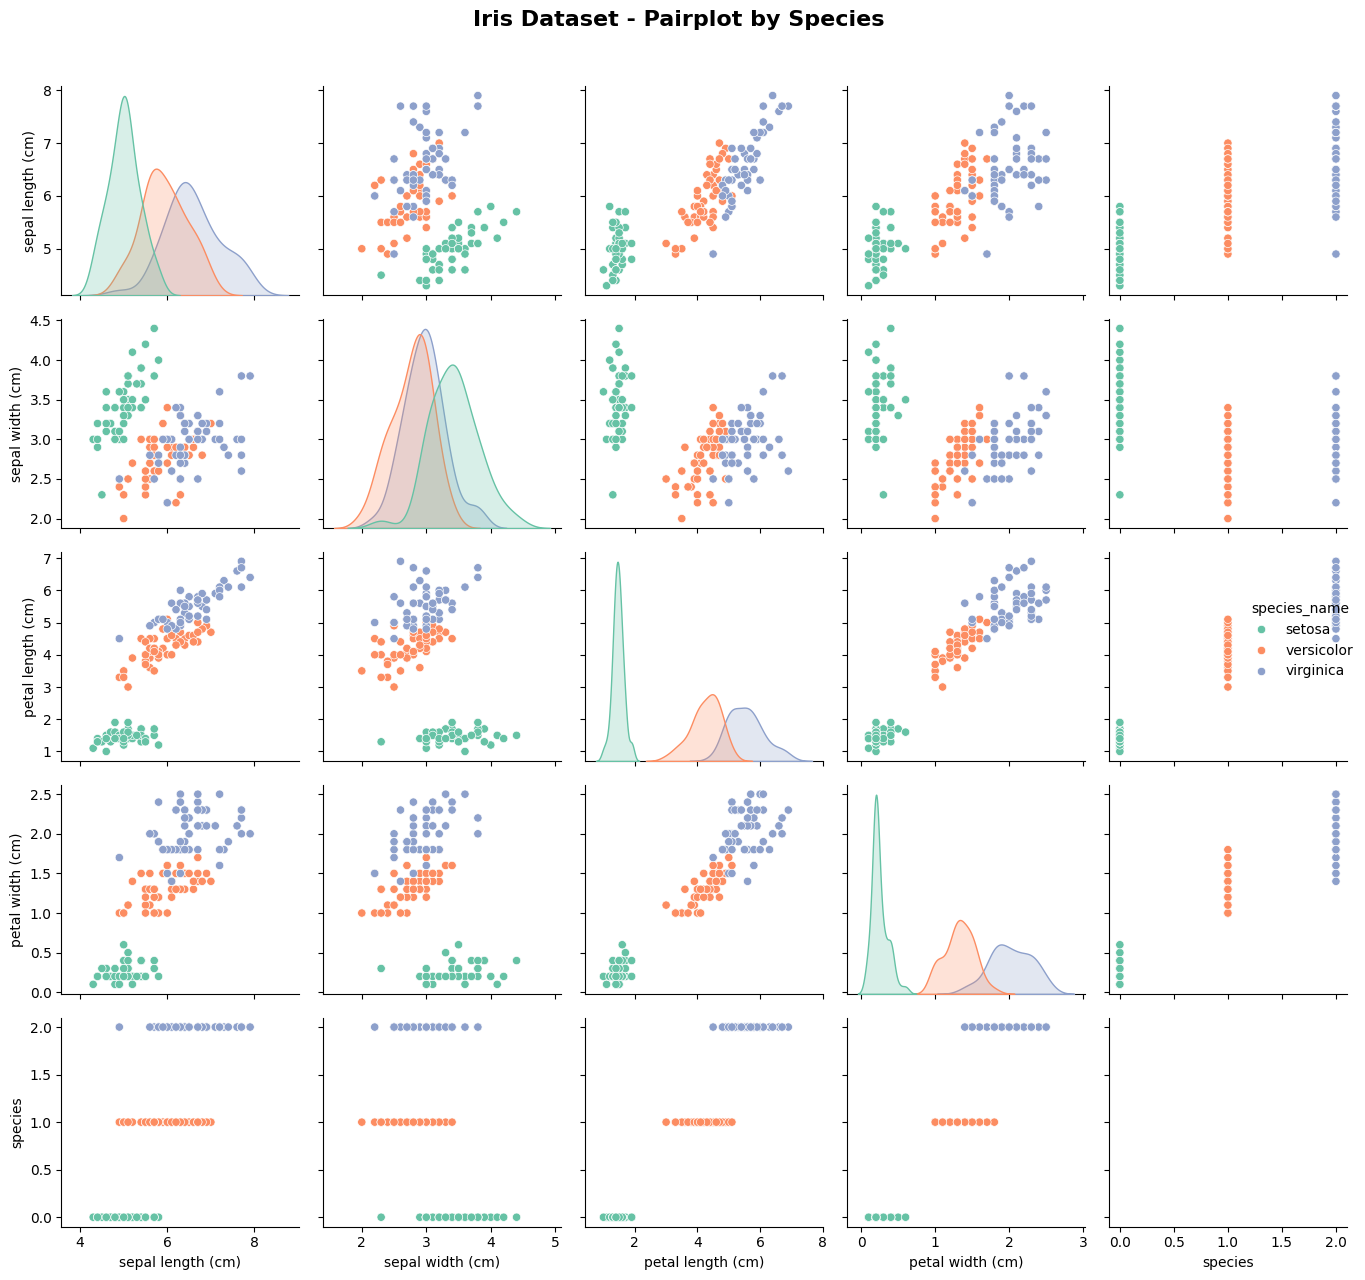

In [13]:
# Create pairplot to visualize relationships between features
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Iris Dataset - Pairplot by Species', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/pairplot.png', dpi=300, bbox_inches='tight')
print("Pairplot saved: images/pairplot.png")
plt.show()